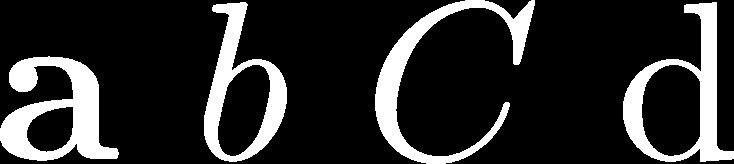

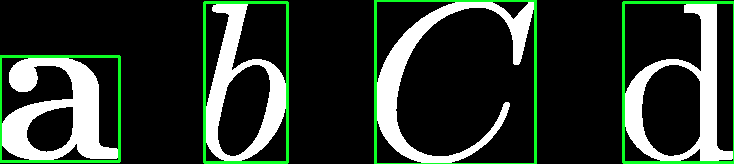

-1

In [6]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('1.png')
copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
    ROI_number += 1

cv2_imshow(thresh)
cv2_imshow( copy)
cv2.waitKey()

Face detection

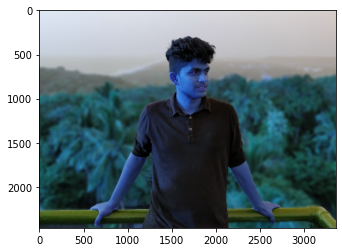

In [9]:
# import libraries
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
image_path = 'walpaper.jpg'
im = cv2.imread(image_path)
plt.imshow(im)
plt.show()

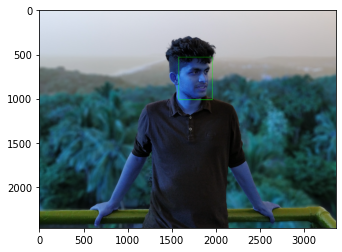

In [15]:
faces, confidences = cv.detect_face(im)

# loop through detected faces and add bounding box
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    
# display output        

plt.imshow(im)
plt.show()

[9.9965858e-01 3.4144535e-04]
['male', 'female']


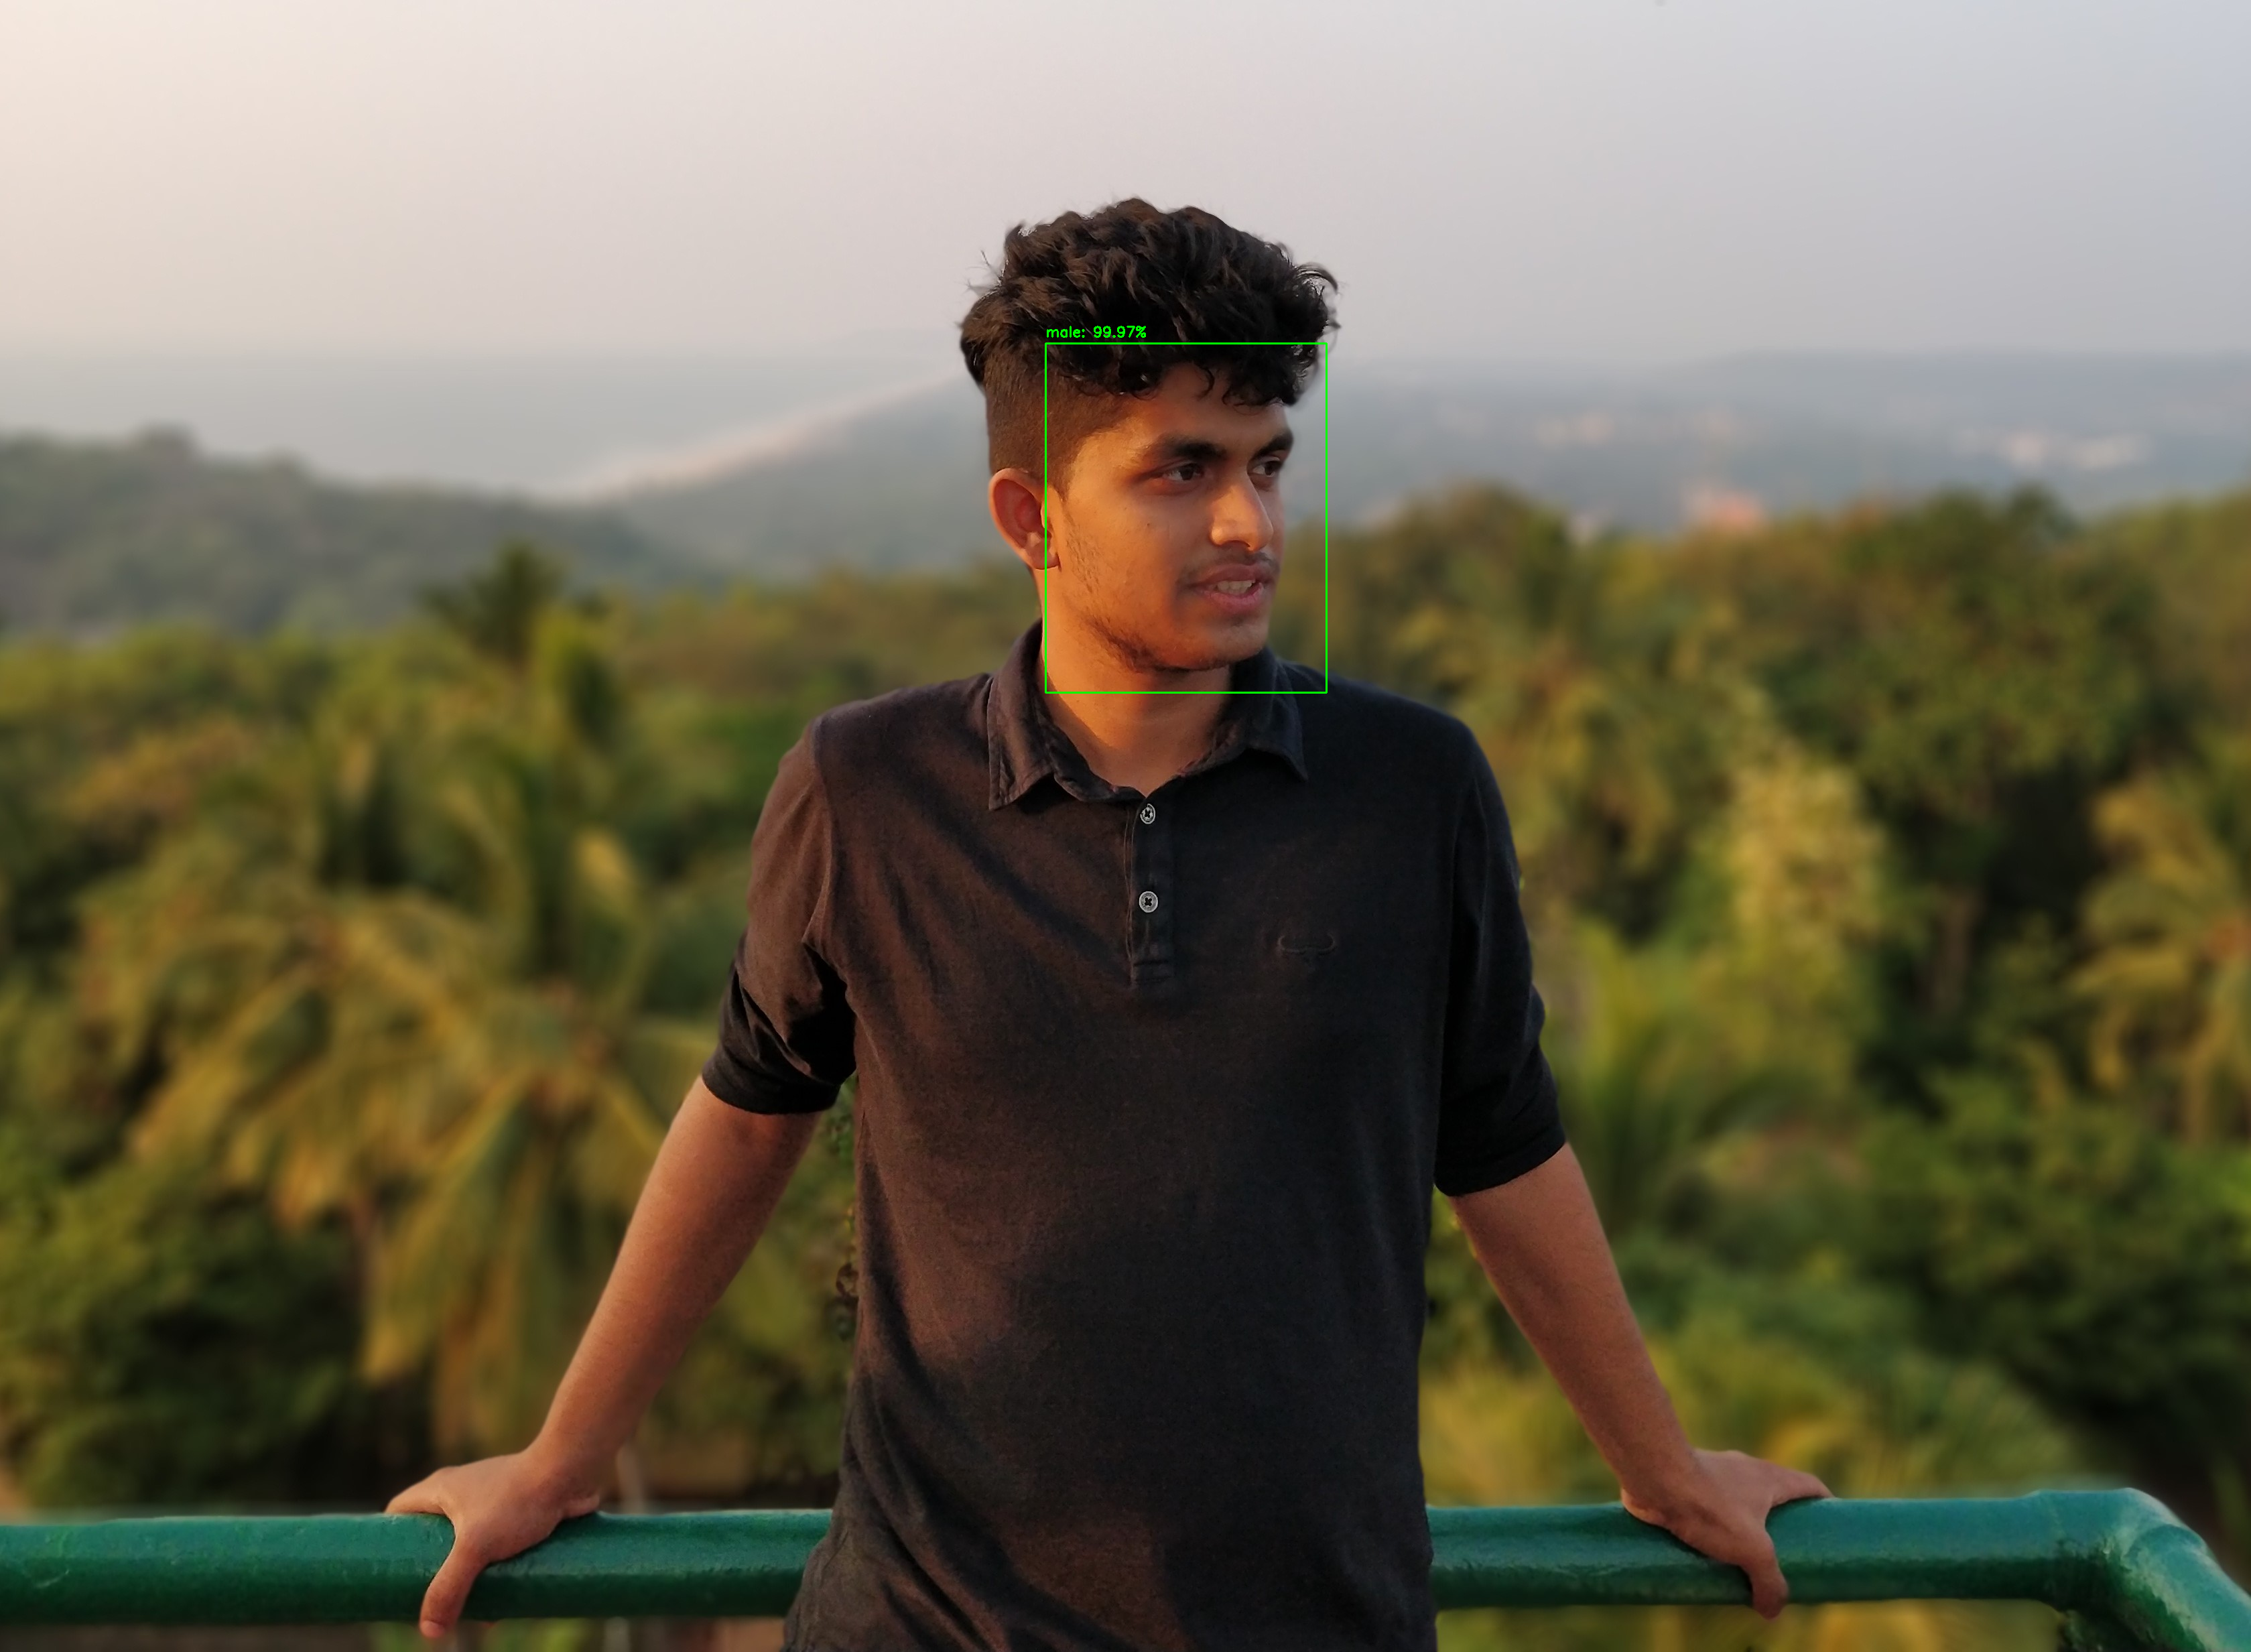

In [18]:
# import necessary packages
import cv2
import cvlib as cv
import sys
import numpy as np

# read input image
img = cv2.imread("walpaper.jpg")

# apply face detection
face, conf = cv.detect_face(img)

padding = 20

# loop through detected faces
for f in face:

    (startX,startY) = max(0, f[0]-padding), max(0, f[1]-padding)
    (endX,endY) = min(img.shape[1]-1, f[2]+padding), min(img.shape[0]-1, f[3]+padding)
    
    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)

    face_crop = np.copy(img[startY:endY, startX:endX])

    # apply gender detection
    (label, confidence) = cv.detect_gender(face_crop)

    print(confidence)
    print(label)

    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# display output
# press any key to close window           
cv2_imshow( img)
cv2.waitKey()

# save output
cv2.imwrite("gender_detection.jpg", img)

# release resources
cv2.destroyAllWindows()

In [19]:
#for more usecases of cv2lib https://github.com/arunponnusamy/cvlib/tree/master/examples